## Import files

In [1]:
import geopandas as gpd
import pandas as pd
import GOSTnets as gn
import networkx as nx
import osmnx as ox
from shapely.geometry import Point
from shapely.geometry import box
from shapely.wkt import loads
import numpy as np

from matplotlib import pyplot as plt

In [2]:
cd /home/op/network_manila

/home/op/network_manila


In [3]:
#https://epsg.io/3123
crs_manila = {'init': 'epsg:3123'}
crs_global = {'init': 'epsg:4326'}

In [4]:
#G_clip = nx.read_gpickle('data_osm_raw/manila_clean_clipped.pickle')

In [5]:
G_disrupted = nx.read_gpickle('data_osm_raw/manila_clean_disrupted.pickle')

In [6]:
hospitals = gpd.read_file(r"asset_data/MetroManila/MetroManila/DOH/HealthFacilities.shp")
schools = gpd.read_file(r"asset_data/MetroManila/MetroManila/DepEd/SchoolLocation.shp")

#hospitals = hospitals[hospitals.intersects(box_gdf.unary_union)]

In [7]:
origin_points = gpd.read_file("asset_data/origin_points_results.geojson")

In [8]:
#import hazard data and asset data for plotting

liquefaction = gpd.read_file(r"hazard_data/Liquefaction/Liquefaction_MetroManila.shp")
faultline = gpd.read_file(r"hazard_data/ActiveFault/ActiveFault_MetroManila.shp")

hospitals = gpd.read_file(r"asset_data/MetroManila/MetroManila/DOH/HealthFacilities.shp")
schools = gpd.read_file(r"asset_data/MetroManila/MetroManila/DepEd/SchoolLocation.shp")


In [9]:
highways_to_keep = ["motorway", "motorway_link", "trunk", "trunk_link" "primary", "primary_link",
                   "secondary", "secondary_link", "tertiary", "tertiary_link"]

G_main = G_disrupted.copy()
edges_to_remove = [(u,v) for  (u,v,attr) in G_main.edges(data=True) if not attr['infra_type'] in highways_to_keep]
G_main.remove_edges_from(edges_to_remove)
G_main.remove_nodes_from(list(nx.isolates(G_main)))

In [10]:
G_main_gdf = gn.edge_gdf_from_graph(G_main)

In [11]:
G_gdf = gn.edge_gdf_from_graph(G_disrupted)

## Create maps

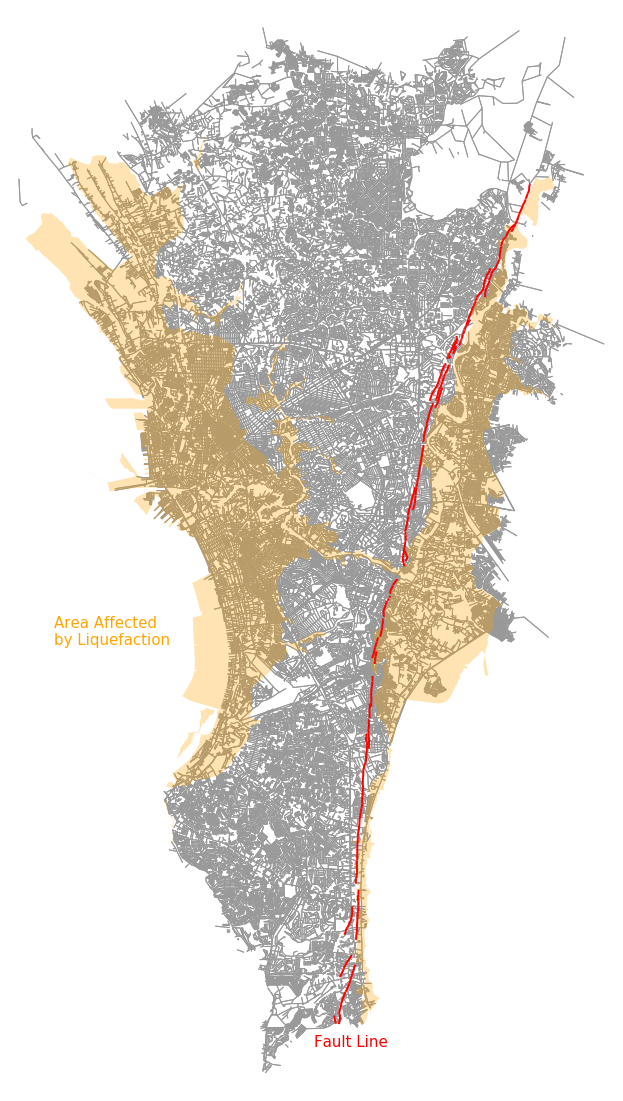

<Figure size 432x288 with 0 Axes>

In [12]:
G_disrupted.graph.update( {'crs' : crs_global} )
G_disrupted.graph.update( {'name' : 'manila'} )
fig, ax = ox.plot_graph(G_disrupted, fig_height=20, axis_off=True, show=False, node_color="None")
plot_fl = faultline.plot(ax=ax, color='red', linewidth=2, zorder=3, label="Fault Line", legend=True)
plot_lq = liquefaction.plot(ax=ax, color='orange', markersize=10, zorder=2, alpha=0.3)
ax.text(120.92,14.53, "Area Affected \nby Liquefaction", fontsize=15, color='orange')
ax.text(121.03,14.36, "Fault Line", fontsize=15, color='red')
fig.savefig("output/roads_hazards.png", dpi = 400)
fig

### Absolute travel time durations

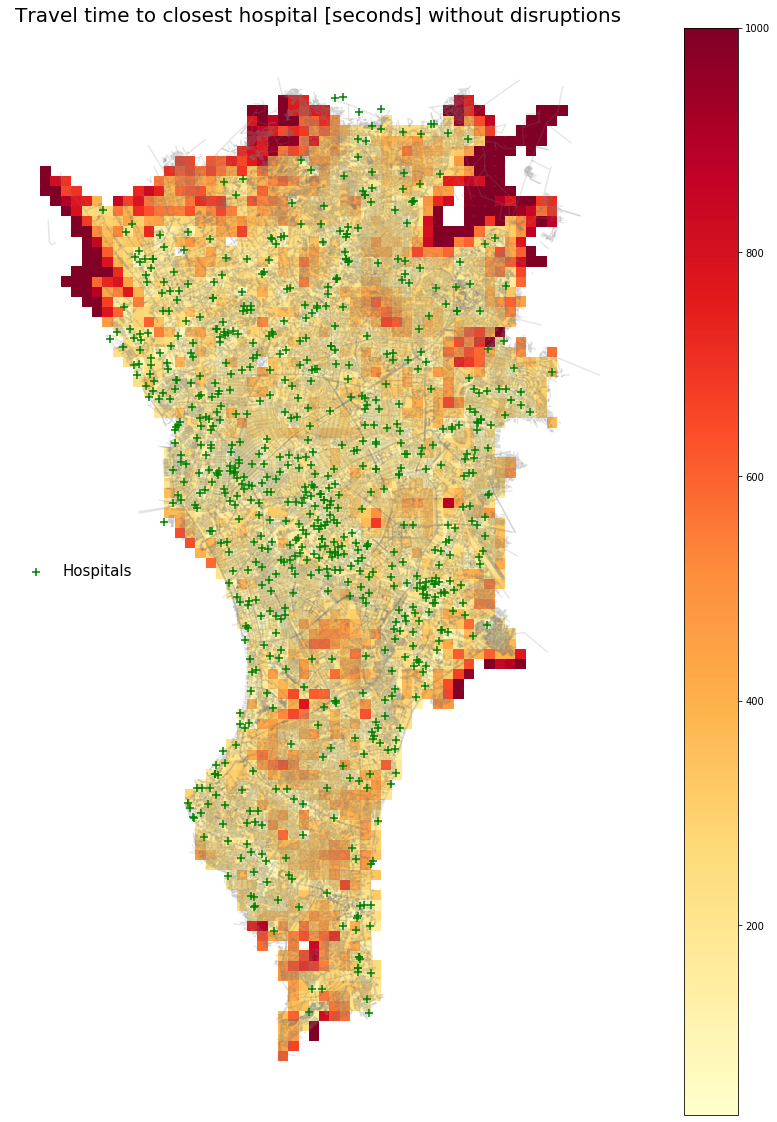

In [13]:
fig, ax = plt.subplots(figsize=(20, 20))
origin_points.plot(
    ax=ax, cmap="YlOrRd", column="min_hospital_distance_seconds", vmax = 1000,
    marker = "s", markersize=90, zorder=-1, legend=True)
hospitals.plot(ax = ax, color="Green", marker="+", markersize=50, zorder=2, label="Hospitals")
G_gdf.plot(ax = ax, color="Grey", zorder=1, alpha = 0.1)
ax.legend(loc='center left',
          fontsize=15,
          frameon=False)

ax.set_title("Travel time to closest hospital [seconds] without disruptions", fontsize=20)
ax.set_axis_off()
fig.savefig("output/hospitaltrips_sec.png", dpi = 400)


In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))
origin_points.plot(
    ax=ax, cmap="YlOrRd", column="min_hospital_distance_seconds_disrupted",  vmax = 3000,
    marker = "s", markersize=90, zorder=-1, legend=True)
origin_points[origin_points.hospitaltrip_impossible_onlyafterdisrupt==1].plot(ax=ax, color="DarkRed", 
                   marker = "s", markersize=90, zorder=-1, legend=True)
hospitals.plot(ax = ax, color="Green", marker="+", markersize=50, zorder=2, label="Hospitals")
G_gdf.plot(ax = ax, color="Grey", zorder=1, alpha = 0.1)
ax.legend(loc='center left',
          fontsize=15,
          frameon=False)

ax.set_title("Travel time to closest hospital [seconds] after earthquake", fontsize=20)
ax.set_axis_off()
fig.savefig("output/hospitaltrips_disrupted_sec.png", dpi = 400)


In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))
origin_points.plot(
    ax=ax, cmap="YlOrRd", column="min_school_distance_seconds", vmax = 1200,
    marker = "s", markersize=90, zorder=-1, legend=True)
schools.plot(ax = ax, color="Green", marker="o", markersize=20, zorder=2, label="Schools")
G_gdf.plot(ax = ax, color="Grey", zorder=1, alpha = 0.1)
ax.legend(loc='center left',
          fontsize=15,
          frameon=False)

ax.set_title("Travel time to closest school [seconds] without disruptions", fontsize=20)
ax.set_axis_off()
fig.savefig("output/schooltrips_sec.png", dpi = 400)


In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))
origin_points.plot(
    ax=ax, cmap="YlOrRd", column="min_school_distance_seconds_disrupted",  vmax = 3000,
    marker = "s", markersize=90, zorder=-1, legend=True)
origin_points[origin_points.schooltrip_impossible_onlyafterdisrupt==1].plot(ax=ax, color="DarkRed", 
                   marker = "s", markersize=90, zorder=-1, legend=True)
schools.plot(ax = ax, color="Green", marker="o", markersize=20, zorder=2, label="Schools")
G_gdf.plot(ax = ax, color="Grey", zorder=1, alpha = 0.1)
ax.legend(loc='center left',
          fontsize=15,
          frameon=False)

ax.set_title("Travel time to closest school [seconds] after earthquake", fontsize=20)
ax.set_axis_off()
fig.savefig("output/schooltrips_disrupted_sec.png", dpi = 400)


### Increase in travel times

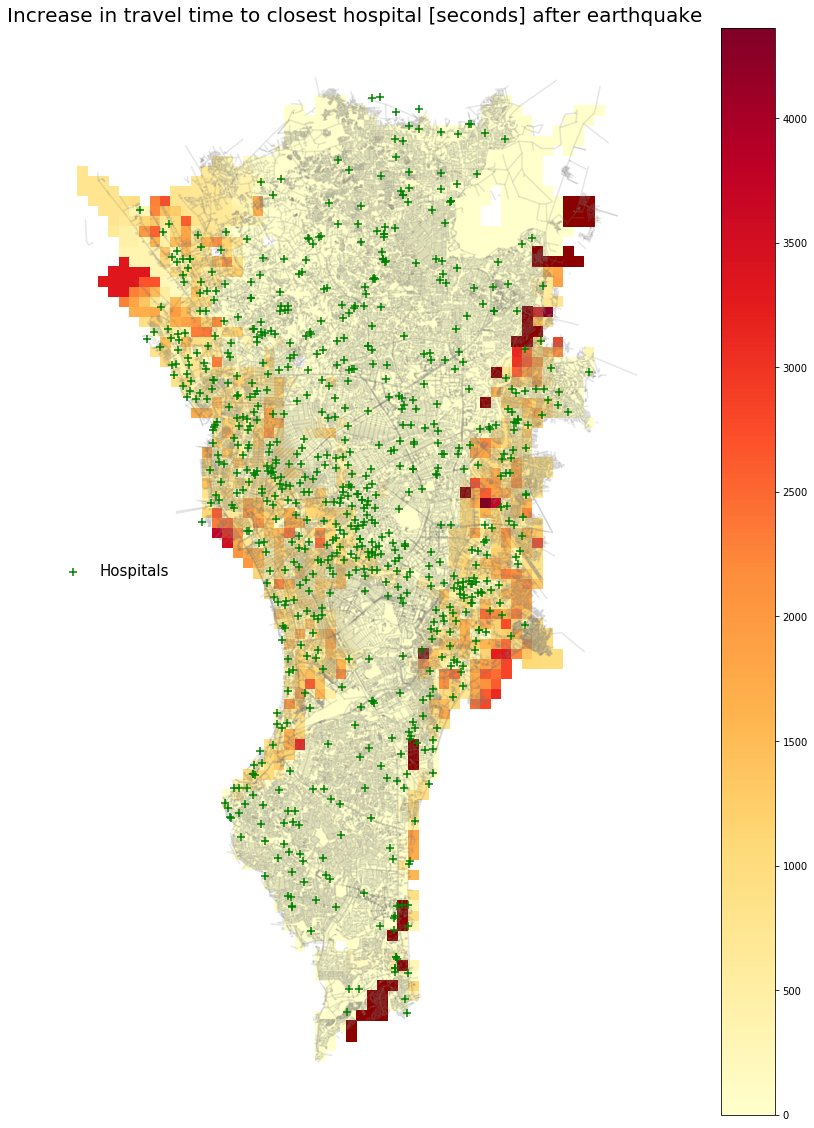

In [14]:
fig, ax = plt.subplots(figsize=(20, 20))
origin_points.plot(ax=ax, cmap="YlOrRd", column="increase_hospital_sec", 
                   marker = "s", markersize=90, zorder=-1, legend=True)
origin_points[origin_points.hospitaltrip_impossible_onlyafterdisrupt==1].plot(ax=ax, color="DarkRed", 
                   marker = "s", markersize=90, zorder=-1, legend=True)
hospitals.plot(ax = ax, color="Green", marker="+", markersize=50, zorder=2, label="Hospitals")
G_gdf.plot(ax = ax, color="Grey", zorder=1, alpha = 0.1)
ax.legend(loc='center left',
          fontsize=15,
          frameon=False)

ax.set_title("Increase in travel time to closest hospital [seconds] after earthquake", fontsize=20)
ax.set_axis_off()
fig.savefig("output/hospitaltrips_increase_sec.png", dpi = 400)


In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))
origin_points.plot(ax=ax, cmap="YlOrRd", column="increase_hospital_perc", 
                   marker = "s", markersize=90, zorder=-1, legend=True)
origin_points[origin_points.hospitaltrip_impossible_onlyafterdisrupt==1].plot(ax=ax, color="DarkRed", 
                   marker = "s", markersize=90, zorder=-1, legend=True)
hospitals.plot(ax = ax, color="Green", marker="+", markersize=50, zorder=2, label="Hospitals")
G_gdf.plot(ax = ax, color="Grey", zorder=1, alpha = 0.1)
ax.legend(loc='center left',
          fontsize=15,
          frameon=False)

ax.set_title("Increase in travel time to closest hospital [percent] after earthquake", fontsize=20)
ax.set_axis_off()
fig.savefig("output/hospitaltrips_increase_perc.png", dpi = 400)


In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))
origin_points.plot(ax=ax, cmap="YlOrRd", column="increase_school_sec", 
                   marker = "s", markersize=90, zorder=-1, legend=True)
origin_points[origin_points.schooltrip_impossible_onlyafterdisrupt==1].plot(ax=ax, color="DarkRed", 
                   marker = "s", markersize=90, zorder=-1, legend=True)
schools.plot(ax = ax, color="Green", marker="o", markersize=20, zorder=2, label="Schools")
G_gdf.plot(ax = ax, color="Grey", zorder=1, alpha = 0.1)
ax.legend(loc='center left',
          fontsize=15,
          frameon=False)
ax.set_title("Increase in travel time to closest school [seconds] after earthquake", fontsize=20)
ax.set_axis_off()
fig.savefig("output/schooltrips_increase_sec.png", dpi = 400)


In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))
origin_points.plot(ax=ax, cmap="YlOrRd", column="increase_school_perc", 
                   marker = "s", markersize=90, zorder=-1, legend=True)
origin_points[origin_points.schooltrip_impossible_onlyafterdisrupt==1].plot(ax=ax, color="DarkRed", 
                   marker = "s", markersize=90, zorder=-1, legend=True)
schools.plot(ax = ax, color="Green", marker="o", markersize=20, zorder=2, label="Schools")
G_gdf.plot(ax = ax, color="Grey", zorder=1, alpha = 0.1)
ax.legend(loc='center left',
          fontsize=15,
          frameon=False)
ax.set_title("Increase in travel time to closest school [percent] after earthquake", fontsize=20)
ax.set_axis_off()
fig.savefig("output/schooltrips_increase_perc.png", dpi = 400)


## Create distribution plot

In [15]:
import seaborn as sns

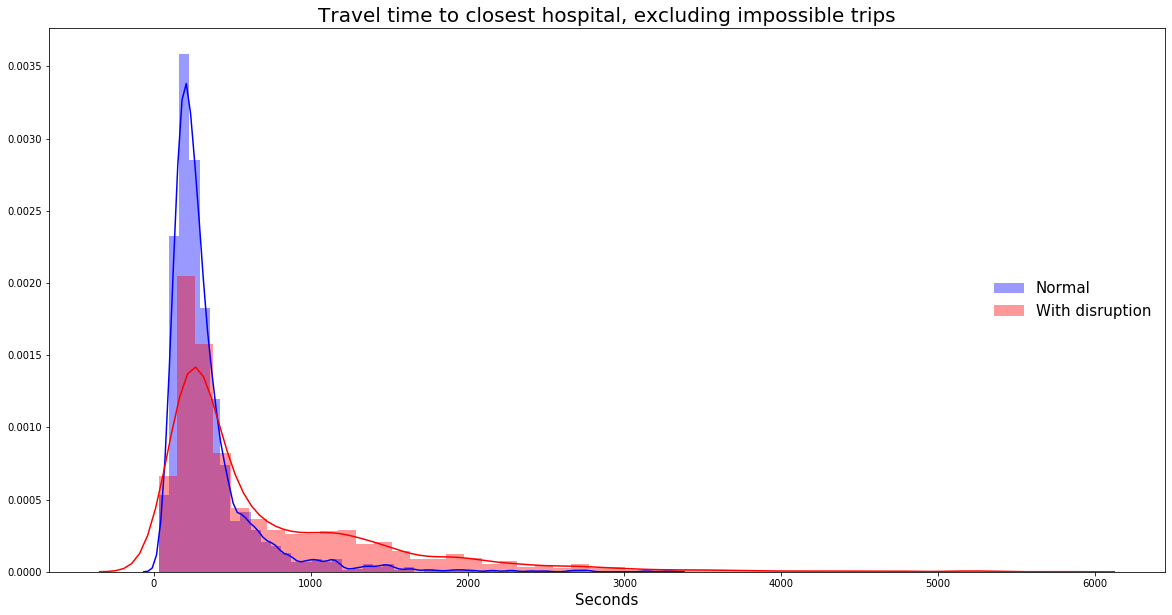

In [16]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.distplot( origin_points["min_hospital_distance_seconds"].dropna(), color="blue", 
             label="Normal", ax=ax)
sns.distplot(origin_points["min_hospital_distance_seconds_disrupted"].dropna(), color="red", 
             label="With disruption", ax =ax)
ax.legend(loc='center right',
          fontsize=15,
          frameon=False)
ax.set_title("Travel time to closest hospital, excluding impossible trips", fontsize = 20)
ax.set_xlabel("Seconds", fontsize = 15)
ax.set_xlabel("Seconds", fontsize = 15)
ax.figsize=(20,20)
fig.savefig("output/hist_hospitaltrips.png", dpi = 400)
fig.show()

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.distplot( origin_points["min_school_distance_seconds"].dropna(), color="blue", 
             label="Normal", ax=ax)
sns.distplot(origin_points["min_school_distance_seconds_disrupted"].dropna(), color="red", 
             label="With disruption", ax =ax)
ax.legend(loc='center right',
          fontsize=15,
          frameon=False)
ax.set_title("Travel time to closest school, excluding impossible trips", fontsize = 20)
ax.set_xlabel("Seconds", fontsize = 15)
ax.set_xlabel("Seconds", fontsize = 15)
ax.figsize=(20,20)
fig.savefig("output/hist_schooltrips.png", dpi = 400)
fig.show()